In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# np.random.seed(123)

Converged: 28700


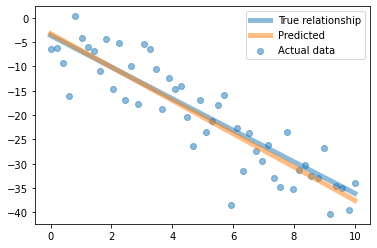

β0: -3.639
β: -3.245
True SSE 1217.067

Predicted: [-3.27221435 -3.42488316]
SSE: 1189.621
--------------------------------------------------


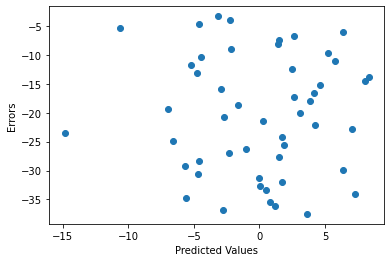

In [3]:
β_true = np.random.normal(0, 5)
β0_true = np.random.normal(0, 5)

x = np.linspace(0, 10)
ϵ = np.random.normal(0, 5, len(x))

y_true = β_true * x + β0_true
y = y_true + ϵ

error_true = y - y_true

sse_true = error_true @ error_true

# estimate parameters

lr = 1e-5 # learning rate
epochs = 1e5

# estimators
X = x.reshape(-1, 1)

X = np.concatenate((np.ones(X.shape), X), axis=1)

β_hat = np.random.normal(0, 5, X.shape[1])

# iterations
epochs = int(epochs)
for i in range(epochs):
    
    
    β_prime = β_hat.copy() # to check convergence
    
    y_hat = X @ β_hat

    errors = y - y_hat

    β_hat -=  -(X.T @ errors) * lr

    sse = errors @ errors.T
    
    
    # check convergence
    if abs(β_hat - β_prime).sum() < 1e-5:
        print('Converged:', i)
        break

# show data
plt.plot(x, y_true, alpha=0.5, lw=5, label='True relationship')
plt.plot(x, y_hat, alpha=0.5, lw=5, label='Predicted')

plt.scatter(x, y, alpha=0.5, label='Actual data')

plt.legend()
plt.show()

print(f'β0: {β0_true : .3f}')
print(f'β: {β_true : .3f}')
print(f'True SSE {sse_true :.3f}\n')


print('Predicted:', β_hat)
print(f'SSE: {sse :.3f}')

print('-' * 50)

plt.scatter(errors, y_hat)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

plt.show()

In [14]:


def OLS_SGD(
    X,
    y,
    lr=1e-5, # learning rate
    epochs=1e5,
    add_intercept=True,
    show=False
):
    
    if add_intercept:
        
        X = np.concatenate((np.ones(X.shape), X), axis=1)

    
    β_hat = np.random.normal(loc=0, scale=5, size=X.shape[1])

    # iterations
    epochs = int(epochs)
    for i in range(epochs):


        β_prime = β_hat.copy() # to check convergence

        y_hat = X @ β_hat

        errors = y - y_hat

        β_hat -= -(X.T @ errors) * lr

        sse = errors @ errors
        
        if show and ((i+1) % int(epochs / 20) == 0):
            print(f'epoch {i+1} of {epochs}, SSE {sse:.2f}')
        
        # check convergence
        if abs(β_hat - β_prime).sum() < 1e-5:
            print('Converged:', i)
            break
            
    return β_hat

In [16]:
OLS_SGD(x.reshape(-1, 1), y, show=True)

epoch 5000 of 100000, SSE 1348.00
epoch 10000 of 100000, SSE 1234.50
epoch 15000 of 100000, SSE 1202.31
epoch 20000 of 100000, SSE 1193.18
epoch 25000 of 100000, SSE 1190.59
epoch 30000 of 100000, SSE 1189.85
epoch 35000 of 100000, SSE 1189.64
Converged: 36174


array([-3.2722211 , -3.42488215])

## Linear Regression
https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/

In [17]:
# get data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(url, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [19]:
# normalized data
data = (df - df.min()) / (df.max() - df.min())

In [5]:
n_folds = 10
fold_size = int(len(data) / n_folds)

# randomize indices into n-folds
indices = np.random.choice(data.index,
                           (n_folds, fold_size),
                           replace=False)

# group data into dataset split
dataset_split = [data.loc[idx] for idx in indices]


epoch 100 of 10000, SSE 83.19
epoch 200 of 10000, SSE 80.46
epoch 300 of 10000, SSE 79.18
epoch 400 of 10000, SSE 78.52
epoch 500 of 10000, SSE 78.16
epoch 600 of 10000, SSE 77.95
epoch 700 of 10000, SSE 77.83
epoch 800 of 10000, SSE 77.75
epoch 900 of 10000, SSE 77.69
epoch 1000 of 10000, SSE 77.65
epoch 1100 of 10000, SSE 77.63
epoch 1200 of 10000, SSE 77.61
epoch 1300 of 10000, SSE 77.59
epoch 1400 of 10000, SSE 77.57
epoch 1500 of 10000, SSE 77.56
epoch 1600 of 10000, SSE 77.55
epoch 1700 of 10000, SSE 77.54
epoch 1800 of 10000, SSE 77.53
epoch 1900 of 10000, SSE 77.52
epoch 2000 of 10000, SSE 77.51
epoch 2100 of 10000, SSE 77.50
epoch 2200 of 10000, SSE 77.49
epoch 2300 of 10000, SSE 77.48
epoch 2400 of 10000, SSE 77.47
epoch 2500 of 10000, SSE 77.47
epoch 2600 of 10000, SSE 77.46
epoch 2700 of 10000, SSE 77.45
epoch 2800 of 10000, SSE 77.44
epoch 2900 of 10000, SSE 77.43
epoch 3000 of 10000, SSE 77.43
epoch 3100 of 10000, SSE 77.42
epoch 3200 of 10000, SSE 77.41
epoch 3300 of 100

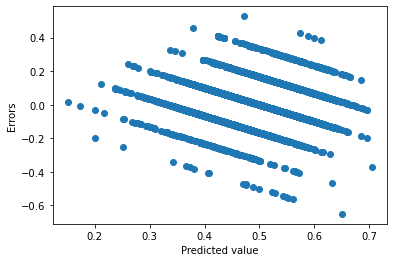

In [6]:
y = data[data.columns[-1]] # target data
X = data[data.columns[:-1]] # feature data
X.insert(0, 'β_0', 1) # add intercept

# gradient descent

l_rate = 1e-4 # learning rate
n_epochs = 1e4 # epochs

n_epochs = int(n_epochs)

β_hat = np.zeros(X.shape[1])

sse = np.zeros(n_epochs)

try:
    
    for epoch in range(n_epochs):

        # for epoch in range(n_epochs):
        y_hat = X @ β_hat

        # partial derivative of loss function
        errors = (y - y_hat)
        δ = -X.T @ errors

        sse[epoch] = errors @ errors

        # gradient * learning rate
        β_hat -= δ * l_rate

        if (epoch + 1) % int(n_epochs / 100) == 0:

            print(f'epoch {epoch+1} of {n_epochs}, SSE {sse[epoch]:.2f}')


except KeyboardInterrupt:
    
    print('Fitting Stopped')
    
# plot errors
plt.scatter(y_hat, errors)
plt.xlabel('Predicted value')
plt.ylabel('Errors')

plt.show()

In [7]:
β_hat.sort_values()

density                -0.439306
volatile acidity       -0.326787
total sulfur dioxide   -0.047145
chlorides              -0.041799
fixed acidity          -0.022052
citric acid            -0.002249
pH                      0.060922
sulphates               0.070240
free sulfur dioxide     0.213805
alcohol                 0.314654
β_0                     0.384808
residual sugar          0.474992
dtype: float64

## Logistic Regression
https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/